Lab 7

The discretized 1D heat equation is given by:

Tnew[i] = T[i] + (2nd derivative of temp with respect to time)(T[i-1] - 2T[i] + T[i+1])

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [48]:
np.linspace(0.9, 0, 10)

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

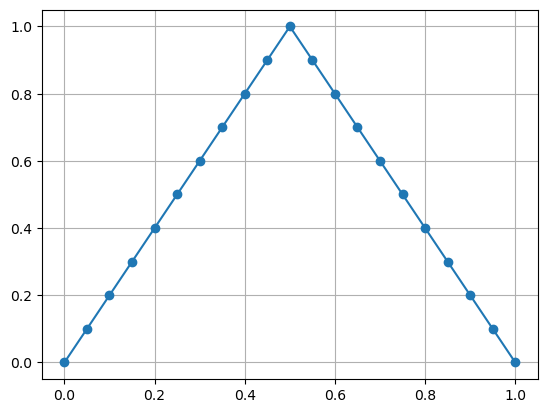

In [49]:
N = 20
L = 1
x = np.linspace(0, L, N + 1)
y = np.append(
    np.linspace(0, 1, N//2 + 1),
    np.linspace(0.9, 0, N//2)
)

plt.plot(x, y, '-o')
plt.grid(True)
plt.show()

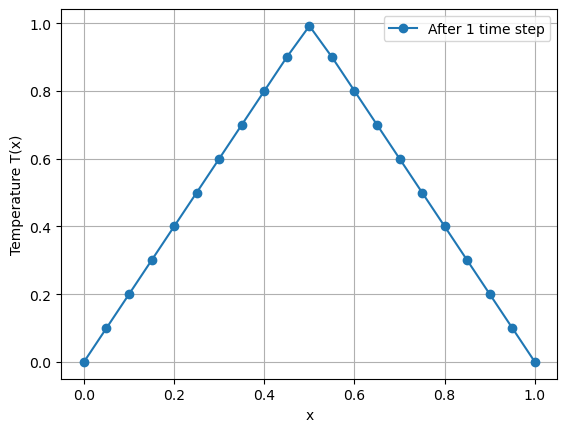

In [50]:
k = 1
dx = L / N
dt = 1e-4

x = np.linspace(0, L, N + 1)
T = np.append(np.linspace(0, 1, N//2 + 1), np.linspace(0.9, 0, N//2))

T[0] = 0
T[-1] = 0

Tnew = np.copy(T)

for i in range(1, N):
    Tnew[i] = T[i] + k * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])

T = np.copy(Tnew)

plt.plot(x, T, '-o', label='After 1 time step')
plt.xlabel("x")
plt.ylabel("Temperature T(x)")
plt.grid(True)
plt.legend()
plt.show()

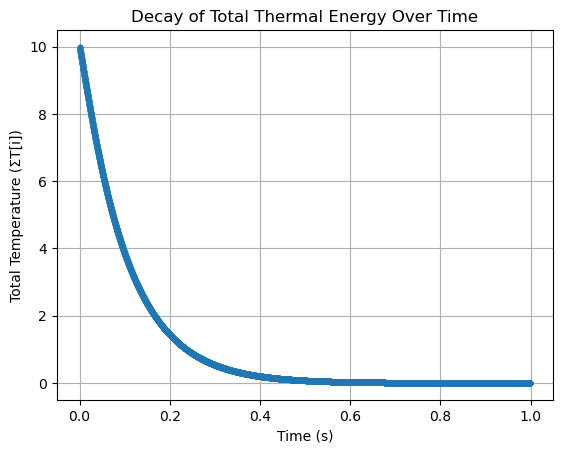

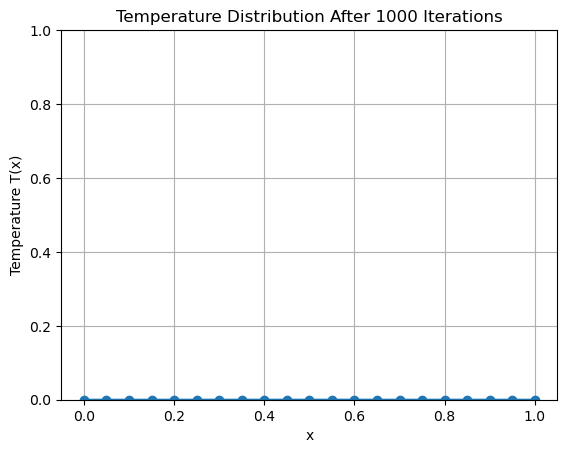

In [51]:
steps = 10000

x = np.linspace(0, L, N + 1)
T = np.append(np.linspace(0, 1, N//2 + 1), np.linspace(0.9, 0, N//2))

T[0] = 0
T[-1] = 0

Tnew = np.copy(T)
energies = []
times = []

for n in range(steps):
    for i in range(1, N):
        Tnew[i] = T[i] + k * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])

    T[:] = Tnew[:]

    energies.append(np.sum(T))
    times.append(n * dt)

plt.plot(times, energies, '-o', markersize=3)
plt.xlabel("Time (s)")
plt.ylabel("Total Temperature (ΣT[i])")
plt.title("Decay of Total Thermal Energy Over Time")
plt.grid(True)
plt.show()

plt.plot(x, T, '-o')
plt.xlabel("x")
plt.ylabel("Temperature T(x)")
plt.title("Temperature Distribution After 1000 Iterations")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

1. It took approximately 1 second (10,000 iterations at 10e-4) to run out of energy
2. The temperature left through the ends. We can see how we start with a sharp triangular peak and then the shape slowly becomes concave down, and the heat distributes towards the ends. Eventually, we know the endpoints are 0 which keep it grounded. I would guess that the energy is being lost through the ends but could definitely be wrong.
3. It gets smoother because the update iteration equation is a normalization through neighboring points. Our inputs are the left and right neighbors and intuitively, the more similar their values are as we distribute heat, the smoother they will look without jaggedy edges. Because we are looking at second derivatives this is curvature-driven smoothing. This means the pointy peak loses changes the most, which will always be at 0.5 and then normalize.


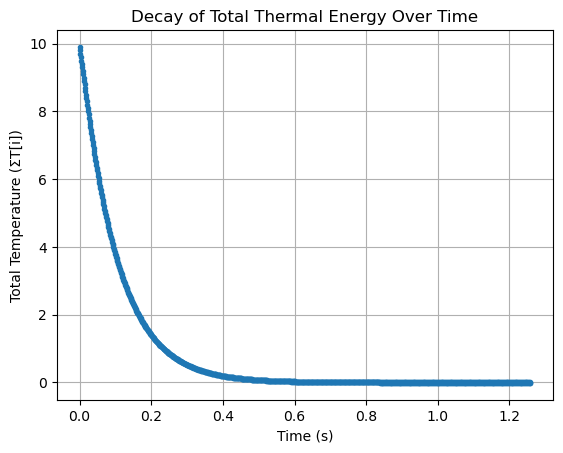

In [59]:
N = 20
L = 1
k = 1
dx = L / N
dt = 0.00126
steps = 1000

x = np.linspace(0, L, N + 1)

T = np.append(np.linspace(0, 1, N//2 + 1), np.linspace(0.9, 0, N//2))

T[0] = 0
T[-1] = 0

Tnew = np.copy(T)
energies = []
times = []

for n in range(steps):
    for i in range(1, N):
        Tnew[i] = T[i] + k * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])

    T[:] = Tnew[:]

    energies.append(np.sum(T))
    times.append(n * dt)

plt.plot(times, energies, '-o', markersize=3)
plt.xlabel("Time (s)")
plt.ylabel("Total Temperature (ΣT[i])")
plt.title("Decay of Total Thermal Energy Over Time")
plt.grid(True)
plt.show()

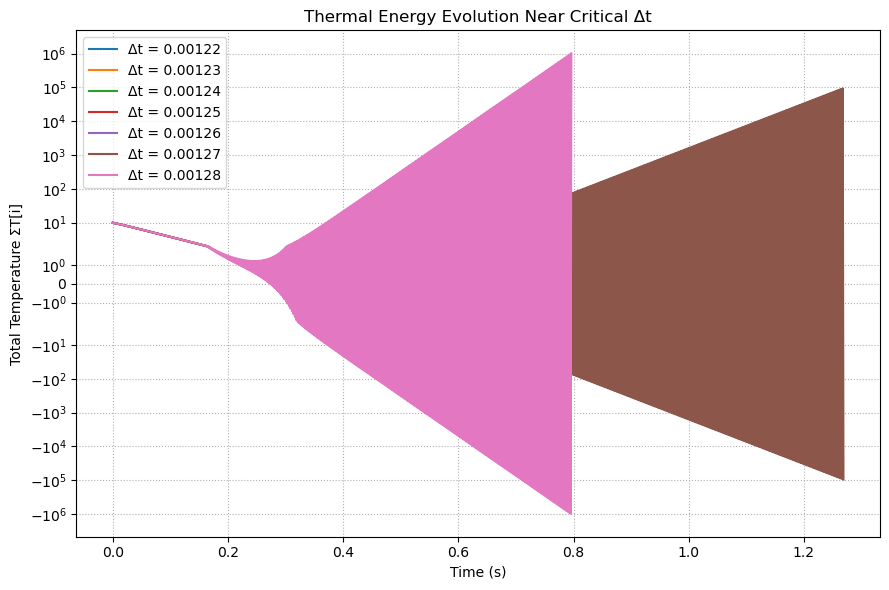

In [53]:
steps = 1000
x = np.linspace(0, L, N + 1)

def run_sim(dt):
    T = np.append(np.linspace(0, 1, N//2 + 1), np.linspace(0.9, 0, N//2))
    T[0], T[-1] = 0, 0
    Tnew = np.copy(T)
    energies, times = [], []

    for n in range(steps):
        for i in range(1, N):
            Tnew[i] = T[i] + k * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
        T[:] = Tnew[:]

        energies.append(np.sum(T))
        times.append(n * dt)

        if not np.isfinite(np.sum(T)) or np.abs(np.sum(T)) > 1e6:
            break

    return np.array(times), np.array(energies)

dt_values = np.arange(0.00122, 0.00129, 0.00001)

plt.figure(figsize=(9,6))
for dt in dt_values:
    times, energies = run_sim(dt)
    plt.plot(times, energies, label=f"Δt = {dt:.5f}")

plt.xlabel("Time (s)")
plt.ylabel("Total Temperature ΣT[i]")
plt.title("Thermal Energy Evolution Near Critical Δt")
plt.yscale("symlog")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

It seems like the critical delta tempearture is between 0.00126 and 0.00127. Where 0.00126 stabilizes but then 0.00127 blows up almost like an unbounded wave. I'm not too sure why that could be the case but it's interesting how it's symmetrical and goes to the negative total temperature which doesn't make sense. My guess is that it's too large of step size where we don't reach the local minimum because we are oscillating past the minimum due to large step size and are cotinously overcorrecting in the other direction that eventually goes to infinity. Based on online this looks like the CFL condition.

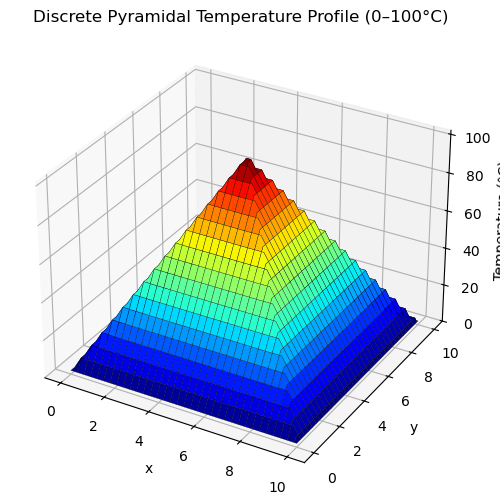

In [57]:
L = 10
dx = 0.1
N = int(L / dx) + 1
Tmax = 100

T = np.zeros((N, N))
layers = N // 2
dT = Tmax / layers

for k in range(layers):
    T[k:N-k, k:N-k] += dT

T[T > Tmax] = Tmax

x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, T, cmap='jet', edgecolor='k', linewidth=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Discrete Pyramidal Temperature Profile (0–100°C)')
plt.show()

In [ ]:
def update_2D(T, k, dt, dx):
    eta = k * dt / dx**2
    N, M = T.shape
    Tnew = np.copy(T)
    
    for i in range(1, N-1):
        for j in range(1, M-1):
            Tnew[i, j] = (
                T[i, j] 
                + eta * (
                    T[i+1, j] + T[i-1, j] + 
                    T[i, j+1] + T[i, j-1] 
                    - 4 * T[i, j]
                )
            )
    return Tnew

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# --- Parameters ---
N = 20
L = 1
k = 1
dx = L / N
dt = 1e-4
steps = 10000

# --- Spatial grid ---
x = np.linspace(0, L, N + 1)

# --- Initial temperature distribution ---
T = np.append(np.linspace(0, 1, N//2 + 1), np.linspace(0.9, 0, N//2))
T[0] = 0
T[-1] = 0
Tnew = np.copy(T)

# --- Energy tracking ---
energies = []
times = []

# --- Set up figure and writer ---
metadata = dict(
    title='1D Heat Equation Evolution',
    artist='Matplotlib',
    comment='Temperature diffusion visualization'
)
writer = FFMpegWriter(fps=30, metadata=metadata, bitrate=1800)

fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(x, T, '-o', lw=2)
ax.set_ylim(0, 1)
ax.set_xlim(0, L)
ax.set_xlabel("x")
ax.set_ylabel("Temperature T(x)")
ax.set_title("1D Heat Diffusion Over Time")

# --- Animate and record ---
with writer.saving(fig, "heat_equation_evolution.mp4", dpi=200):
    for n in range(steps):
        # Explicit finite difference update
        for i in range(1, N):
            Tnew[i] = T[i] + k * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
        T[:] = Tnew[:]

        # Record total energy
        energies.append(np.sum(T))
        times.append(n * dt)

        # Update animation every 50 steps
        if n % 50 == 0:
            line.set_ydata(T)
            ax.set_title(f"1D Heat Diffusion — Step {n}/{steps}")
            writer.grab_frame()

plt.close()
print("Animation saved")

✅ Animation saved as 'heat_equation_evolution.mp4'


In [61]:
L = 10
dx = 0.1
N = int(L / dx) + 1
k = 1
dt = 0.002
steps = 10000
Tmax = 100

T = np.zeros((N, N))
layers = N // 2
dT = Tmax / layers

for m in range(layers):
    T[m:N-m, m:N-m] += dT

T[T > Tmax] = Tmax

x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

eta = k * dt / dx**2
print(f"η = {eta:.4f} (must be < 0.25 for stability)")

metadata = dict(title='2D Heat Equation - Pyramid Melting',
                artist='Matplotlib',
                comment='2D diffusion simulation')
writer = FFMpegWriter(fps=30, metadata=metadata, bitrate=1800)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, T, cmap='jet', edgecolor='k', linewidth=0.2)
ax.set_zlim(0, Tmax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Pyramidal Heat Diffusion (t = 0)')

def update_2D(T, k, dt, dx):
    eta = k * dt / dx**2
    Tnew = np.copy(T)
    N, M = T.shape
    for i in range(1, N-1):
        for j in range(1, M-1):
            Tnew[i, j] = (
                T[i, j]
                + eta * (
                    T[i+1, j] + T[i-1, j] +
                    T[i, j+1] + T[i, j-1]
                    - 4*T[i, j]
                )
            )
    Tnew[0, :] = 0
    Tnew[-1, :] = 0
    Tnew[:, 0] = 0
    Tnew[:, -1] = 0
    return Tnew

with writer.saving(fig, "pyramid_melting.mp4", dpi=200):
    for n in range(steps):
        T = update_2D(T, k, dt, dx)

        if n % 50 == 0:
            ax.clear()
            surf = ax.plot_surface(X, Y, T, cmap='jet', edgecolor='k', linewidth=0.2)
            ax.set_zlim(0, Tmax)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('Temperature (°C)')
            ax.set_title(f"2D Heat Diffusion (t = {n*dt:.3f}s)")
            writer.grab_frame()

plt.close()
print("Animation saved")

η = 0.2000 (must be < 0.25 for stability)
✅ Animation saved as 'pyramid_melting.mp4'


The ice pyramid melted